# Employee Exit Surveys

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv ('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Initial Observation

In [3]:
#dete_survey.info()

In [4]:
#tafe_survey.info()

In [5]:
#dete_survey.isnull().sum(axis=0)

In [6]:
dete_survey_updated = dete_survey.drop (list(dete_survey.columns[28:49]), axis=1)
tafe_survey_updated = tafe_survey.drop (list(tafe_survey.columns[17:66]), axis=1)

In [7]:
dete_survey_updated.columns = [x.lower().strip().replace(' ','_') for x in list (dete_survey_updated.columns)]

In [8]:
tafe_renames = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [9]:
tafe_survey_updated.rename(columns=tafe_renames, inplace=True)

In [10]:
#tafe_survey_updated.columns

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
tafe_resignations = tafe_survey_updated [tafe_survey_updated['separationtype'] == 'Resignation']

In [14]:
dete_resignations =  dete_survey_updated [dete_survey_updated['separationtype'].str.match('Resignation')]

In [15]:
year = list (dete_resignations['cease_date'])
year = [str(y)[-4:] for y in year if y != 'nan']
dete_resignations['year'] = np.array (year)
dete_resignations['year'] = dete_resignations['year'].astype ('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
tafe_resignations['year'] = tafe_resignations['cease_date']
# tafe_resignations['year'] = tafe_resignations['year'].astype ('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
dete_resignations['year'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: year, dtype: int64

In [18]:
tafe_resignations['year'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: year, dtype: int64

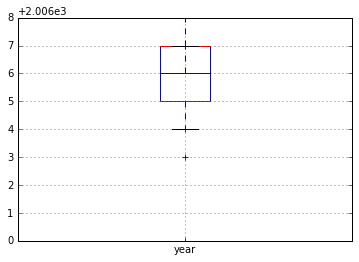

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
dete_resignations.boxplot(column=['year'])
tafe_resignations.boxplot(column=['year'])

### Secondary Observation

1. Years fixed, for checking range of employment
2. Need to combine and do analysis

In [20]:
dete_resignations['institute_service'] = dete_resignations['dete_start_date'] - dete_resignations['year']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
dete_resignations.reset_index (inplace=True)
tafe_resignations.reset_index (inplace=True)

In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(x):
    if pd.isnull(x) == True:
        return np.nan
    if x == '-':
        return False
    else:
        return True

In [25]:
tafe_factors = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations [tafe_factors] = tafe_resignations [tafe_factors].applymap (update_vals)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [26]:
# tafe_resignations [factors] 

In [27]:
dete_factors = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

In [28]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_factors].any(axis=1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
dete_resignations['dissatisfied'] = dete_resignations[dete_factors].any(axis=1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [31]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [32]:
dete_resignations_up.columns.values

array(['index', 'id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'maternity/family', 'relocation',
       'study/travel', 'ill_health', 'traumatic_incident',
       'work_life_balance', 'workload', 'none_of_the_above', 'gender',
       'age', 'aboriginal', 'torres_strait', 'south_sea', 'disability',
       'nesb', 'year', 'institute_service', 'dissatisfied', 'institute'],
      dtype=object)

In [33]:
tafe_resignations_up.columns.values

array(['index', 'id', 'Institute', 'WorkArea', 'cease_date',
       'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'gender', 'age', 'employment_status', 'position',
       'institute_service', 'role_service', 'year', 'dissatisfied',
       'institute'], dtype=object)

In [34]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [35]:
combined_updated = combined.dropna(thresh=500, axis=1)

### Combined Columns

1. Created Supplemental Columns for further analytsis of job satisfaction, resignation, and and tenure in position.
2. Created columns include :<br>
    a. Institute Column for DETE and TAFE, identification when combined<br>
    b. General job dissatisfaction column<br>
    c. Tenure years before resignations
3. DETE and TAFE institutes are combined into one = COMBINED.

In [36]:
combined_updated.head

<bound method DataFrame.head of              age cease_date  dissatisfied    employment_status  gender  \
0          36-40    05/2012         False  Permanent Full-time  Female   
1          41-45    05/2012          True  Permanent Full-time  Female   
2          31-35    07/2012         False  Permanent Full-time  Female   
3          46-50       2012          True  Permanent Part-time  Female   
4          31-35       2012         False  Permanent Full-time    Male   
5          36-40       2012         False  Permanent Full-time  Female   
6          31-35       2012          True  Permanent Full-time    Male   
7    61 or older       2012          True  Permanent Part-time    Male   
8          56-60       2012         False  Permanent Full-time    Male   
9          51-55       2012         False  Permanent Part-time  Female   
10         46-50       2012          True  Permanent Part-time  Female   
11   61 or older       2012          True  Permanent Full-time  Female   
12    

In [37]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
str(combined_updated['institute_service_up'][7]) == 'nan'

True

In [40]:
def exp (x):
    if str(x) == 'nan':
        return np.nan
    if x < 3:
        return 'NEW'
    if x < 7:
        return 'EXP'
    if x < 11:
        return 'EST'
    else:
        return 'VET'

In [41]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply (exp)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
combined_updated['service_cat']

0      EST
1      VET
2      EXP
3      VET
4      EXP
5      VET
6      EXP
7      NaN
8      VET
9      VET
10     VET
11     VET
12     VET
13     EST
14     EST
15     EXP
16     NEW
17     NaN
18     VET
19     VET
20     NEW
21     VET
22     EXP
23     EXP
24     VET
25     EXP
26     EST
27     NEW
28     EXP
29     NEW
      ... 
621    NEW
622    EXP
623    EXP
624    NaN
625    NaN
626    EXP
627    NaN
628    NEW
629    NEW
630    NEW
631    NEW
632    EXP
633    NEW
634    NEW
635    NEW
636    NEW
637    EXP
638    NEW
639    EXP
640    EXP
641    NEW
642    NaN
643    EXP
644    NEW
645    NaN
646    EXP
647    NEW
648    NaN
649    EXP
650    EXP
Name: service_cat, Length: 651, dtype: object

In [45]:
combined_final = combined.copy()
combined_final.to_csv('combined_final.csv',index=False,header=True)